# Recherche des zéros d'une fonction par la méthode de la dichotomie

On dispose d'une fonction $f : x \mapsto f(x)$, définie sur un intervalle $[a,b]$, et on cherche un zéro de la fonction, soit un point $x_0$ tel que $f(x_0) = 0$.

La méthode de la dichotomie (aussi appellée méthode de la bissection) est possible si la fonction est monotone sur l'intervalle $[a,b]$.

## Principe

Si $f(a)$ et $f(b)$ ne sont pas de même signe, on sait que la fonction s'annule sur cet intervalle et donc $x_0 \in [a,b]$.

On définit alors le point milieu : $ m_1 = \frac{a+b}{2}$, et on cherche si le zéro est dans l'intervalle $[a,m_1]$ ou dans l'intervalle $[m_1,b]$.

Si $f(m)$ est du même signe que $f(a)$, on a $x_0 \in [m_1,b]$, dans le cas contraire on a $x_0 \in [a,m_1]$.

On a donc réduit notre intervalle de recherche de moitié. En réitérant la méthode autant de fois que nécéssaire on peut donc déterminer un encadrement très fin du zéro de la fonction.

##### Chargement des modules utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exemple avec la fonction ln(x)

Considérons la fonction $f : x \mapsto \ln(x)$ définie sur l'intervalle $[0,5; 2]$.

In [2]:
a1 = 0.5
b1 = 2.
f1 = lambda x : np.log(x)

Traçons la fonction sur l'intervalle considéré :

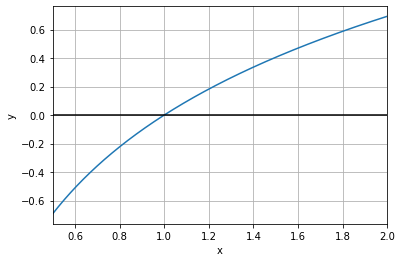

In [3]:
x = np.linspace(a1,b1,num=1000)
plt.plot(x,f1(x))
plt.axhline(y=0,color='black')
plt.xlim(0.5,2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

La fonction est monotone sur l'intervalle $[0,5,2,0]$. On définit le point milieu : $m_1 = 1,25$.

On a $f(1,25) > 0$, donc le zéro est dans l'intervalle $[0,5;1,25]$.

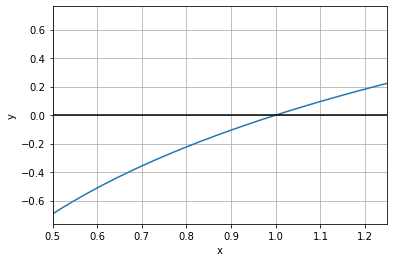

In [4]:
x = np.linspace(a1,b1,num=1000)
plt.plot(x,f1(x))
plt.xlim(0.5,1.25)
plt.axhline(y=0,color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Prenons le nouveau point milieu, $m_2 = 0,875$.

On a $f(0.875) < 0$, donc le zéro est dans l'intervalle $[0,875 ; 1,25]$.

Pour répéter ces étapes on utilise la boucle suivante :

In [5]:
N_etapes = 10
limite_superieure = b1
limite_inferieure = a1

for i in range(N_etapes):
    m = (limite_superieure + limite_inferieure) / 2 # calcul du point milieu
    y = f1(m) # calcul de f(m)
    if y>0:
        limite_superieure = m
    else:
        limite_inferieure = m


print("inf : ",limite_inferieure)
print("sup : ",limite_superieure)

inf :  0.99951171875
sup :  1.0009765625


La chose chose qui nous manque est un critère de sortie. On peut par exemple décider que lorsque la largeur de l'intervalle est plus petite qu'une valeur $\epsilon$ la boucle est interrompue.

In [6]:
limite_superieure = b1
limite_inferieure = a1
nombre_etapes = 0

while ( (limite_superieure - limite_inferieure) > 1.0e-14 ):
    nombre_etapes = nombre_etapes + 1
    m = (limite_superieure + limite_inferieure) / 2 # calcul du point milieu
    y = f1(m) # calcul de f(m)
    if y>0:
        limite_superieure = m
    else:
        limite_inferieure = m

print("nombre d'etapes : ", nombre_etapes)
print("inf : ",limite_inferieure)
print("sup : ",limite_superieure)

nombre d'etapes :  48
inf :  0.9999999999999982
sup :  1.0000000000000036


## Utilisation de la fonction bisect du module scipy.optimize

In [7]:
from scipy.optimize import bisect
help(bisect)

Help on function bisect in module scipy.optimize._zeros_py:

bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
    Find root of a function within an interval using bisection.
    
    Basic bisection routine to find a zero of the function `f` between the
    arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
    Slow but sure.
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous, and
        f(a) and f(b) must have opposite signs.
    a : scalar
        One end of the bracketing interval [a,b].
    b : scalar
        The other end of the bracketing interval [a,b].
    xtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(x, x0,
        atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
        parameter must be nonnegative.
    rtol : number, optional
        The computed root ``x0`` will satisfy ``np.allcl

Exemple avec la fonction $f:x\mapsto \cos(x)$ sur l'intervalle $[0,\pi]$

In [8]:
f2 = lambda x: np.cos(x) 
a2 = 0.0
b2 = np.pi

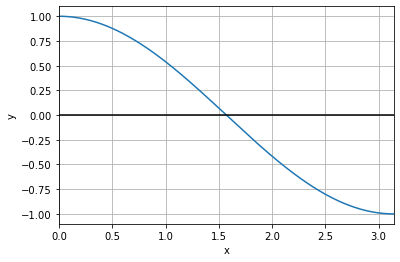

In [9]:
x = np.arange(a2,b2,step=0.01)
plt.plot(x,f2(x))
plt.xlim(a2,b2)
plt.axhline(y=0,color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [10]:
x0 = bisect(f2,a2,b2, xtol=1.e-15)
print("zero de la fonction cosinus : ", x0)
print("valeur de pi/2 : ", np.pi/2)

zero de la fonction cosinus :  1.570796326794898
valeur de pi/2 :  1.5707963267948966


## Avec la fonction du TD

$$f: x \mapsto \frac{x}{(0.01-x)(0.04-4x)^4 10^4} - 1$$
définie sur l'intervale $[0,0 ; 0.01]$

In [11]:
f3 = lambda x: x/(0.01-x)/(0.04-4*x)**4 / 1.0e4 - 1.0
a3 = 0.0
b3 = 0.009

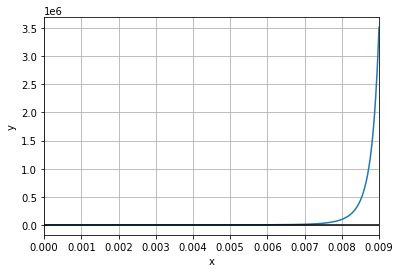

In [12]:
x = np.linspace(a3,b3,num=1000)
plt.plot(x,f3(x))
plt.xlim(a3,b3)
plt.axhline(y=0,color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [13]:
x0 = bisect(f3,a3,b3, xtol=1.e-15)
print("zero de la fonction : ", x0)

zero de la fonction :  0.00022810458575435173
